## Python Code for Analyzing the US Crime Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('report.csv')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   report_year agency_code agency_jurisdiction  population  violent_crimes  \
0         1975     NM00101     Albuquerque, NM    286238.0          2383.0   
1         1975     TX22001       Arlington, TX    112478.0           278.0   
2         1975     GAAPD00         Atlanta, GA    490584.0          8033.0   
3         1975     CO00101          Aurora, CO    116656.0           611.0   
4         1975     TX22701          Austin, TX    300400.0          1215.0   

   homicides  rapes  assaults  robberies  months_reported  crimes_percapita  \
0       30.0  181.0    1353.0      819.0             12.0            832.52   
1        5.0   28.0     132.0      113.0             12.0            247.16   
2      185.0  443.0    3518.0     3887.0             12.0           1637.44   
3        7.0   44.0     389.0      171.0             12.0            523.76   
4       33.0  190.0     463.0      529.0             12.0            404.46   

   homicides_percapita  r

In [4]:
# Summary statistics for numerical columns
print("\nSummary statistics for the dataset:")
print(df.describe())


Summary statistics for the dataset:
       report_year    population  violent_crimes     homicides        rapes  \
count  2829.000000  2.760000e+03    2.794000e+03   2795.000000  2754.000000   
mean   1995.000000  7.956981e+05    2.963255e+04    398.385331   416.278867   
std      11.834251  1.012451e+06    1.728630e+05   2281.276402   479.811934   
min    1975.000000  1.007630e+05    1.540000e+02      1.000000    15.000000   
25%    1985.000000  3.779310e+05    3.014750e+03     32.000000   176.250000   
50%    1995.000000  5.366145e+05    5.135500e+03     64.000000   291.000000   
75%    2005.000000  8.168558e+05    9.058500e+03    131.000000   465.000000   
max    2015.000000  8.550861e+06    1.932274e+06  24703.000000  3899.000000   

           assaults      robberies  months_reported  crimes_percapita  \
count   2753.000000    2754.000000      2692.000000       2794.000000   
mean    4405.146023    4000.245098        11.868871       1093.049810   
std     6977.293769    8653.9029

In [15]:
# Correlation matrix for numerical columns
print("\nCorrelation matrix for numerical columns:")
corr_matrix = df.corr()
print(corr_matrix)


Correlation matrix for numerical columns:
                     report_year  population  violent_crimes  homicides  \
report_year             1.000000    0.066498       -0.004466  -0.023396   
population              0.066498    1.000000        0.843667   0.777767   
violent_crimes         -0.004466    0.843667        1.000000   0.987591   
homicides              -0.023396    0.777767        0.987591   1.000000   
rapes                  -0.107151    0.751673        0.886098   0.882889   
assaults                0.010825    0.844437        0.969106   0.890391   
robberies              -0.095505    0.805544        0.980196   0.941071   
months_reported        -0.000761   -0.008955        0.011614   0.013706   
crimes_percapita       -0.135834    0.025491       -0.062972  -0.062142   
homicides_percapita    -0.162473    0.011986       -0.054270  -0.037024   
rapes_percapita        -0.294407   -0.172994        0.072649   0.110951   
assaults_percapita     -0.006686   -0.028732        0.260

C:\Users\bikas\AppData\Local\Temp\ipykernel_26256\557941008.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [7]:
# Set up plot aesthetics
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")

C:\Users\bikas\AppData\Local\Temp\ipykernel_26256\3037727501.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


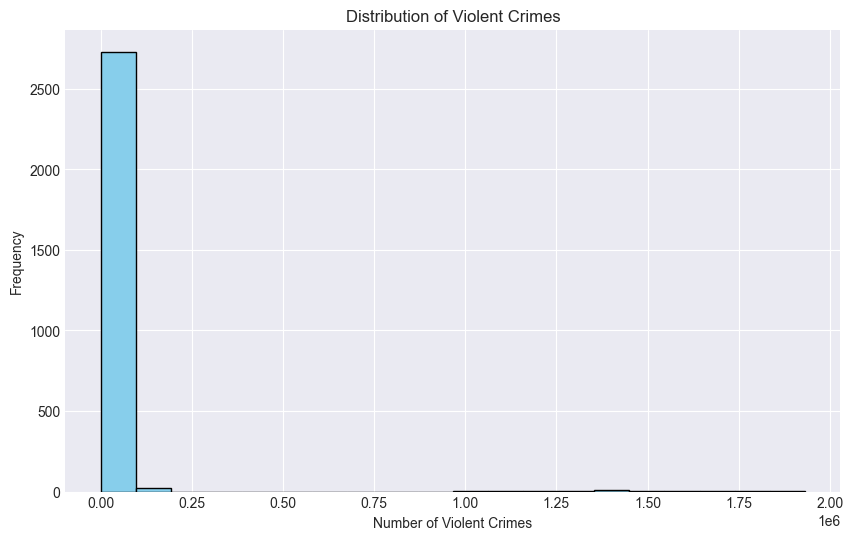

In [16]:
# Plot 1: Histogram of Violent Crimes
plt.figure(figsize=(10, 6))
plt.hist(df['violent_crimes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Violent Crimes')
plt.xlabel('Number of Violent Crimes')
plt.ylabel('Frequency')
plt.show()

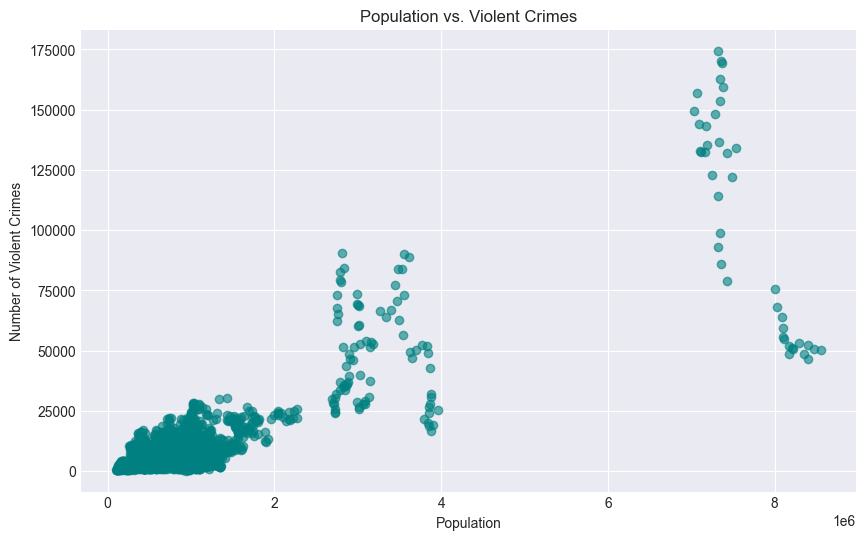

In [17]:
# Plot 2: Scatter plot of Population vs. Violent Crimes
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['violent_crimes'], alpha=0.6, color='teal')
plt.title('Population vs. Violent Crimes')
plt.xlabel('Population')
plt.ylabel('Number of Violent Crimes')
plt.show()

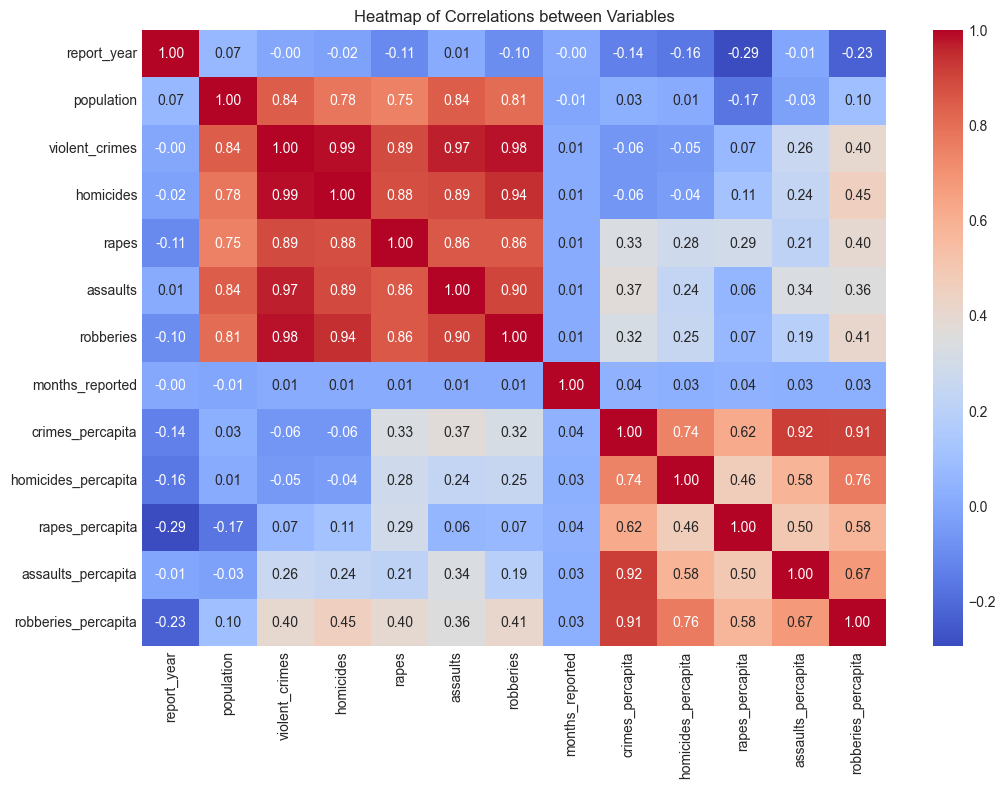

In [10]:
# Plot 3: Heatmap of the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations between Variables')
plt.show()

In [12]:
# Additional analysis: Top 5 jurisdictions by violent crimes
top_5_crime_jurisdictions = df.nlargest(5, 'violent_crimes')[['agency_jurisdiction', 'violent_crimes']]
print("\nTop 5 jurisdictions by violent crimes:")
print(top_5_crime_jurisdictions)


Top 5 jurisdictions by violent crimes:
     agency_jurisdiction  violent_crimes
1241       United States       1932274.0
1310       United States       1926017.0
1172       United States       1911767.0
1379       United States       1857670.0
1103       United States       1820127.0


In [13]:
# Calculate and display correlation of specific columns with violent crimes
crime_corr = df[['violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies']].corr()
print("\nCorrelation of violent crimes with specific types of crimes:")
print(crime_corr['violent_crimes'])


Correlation of violent crimes with specific types of crimes:
violent_crimes    1.000000
homicides         0.987591
rapes             0.886098
assaults          0.969106
robberies         0.980196
Name: violent_crimes, dtype: float64


Creating graphs with individual function

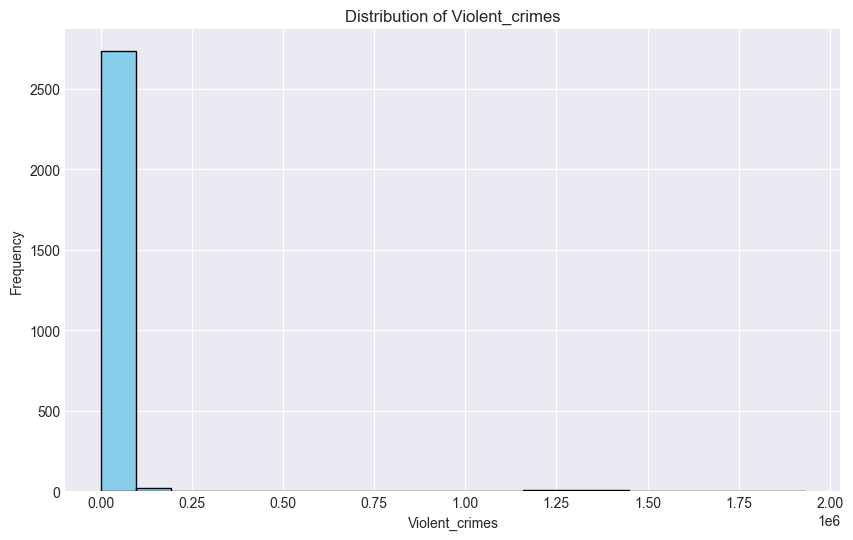

In [14]:
# Function to generate individual graphs
def plot_histogram(column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# Calling the function for violent crimes
plot_histogram('violent_crimes')


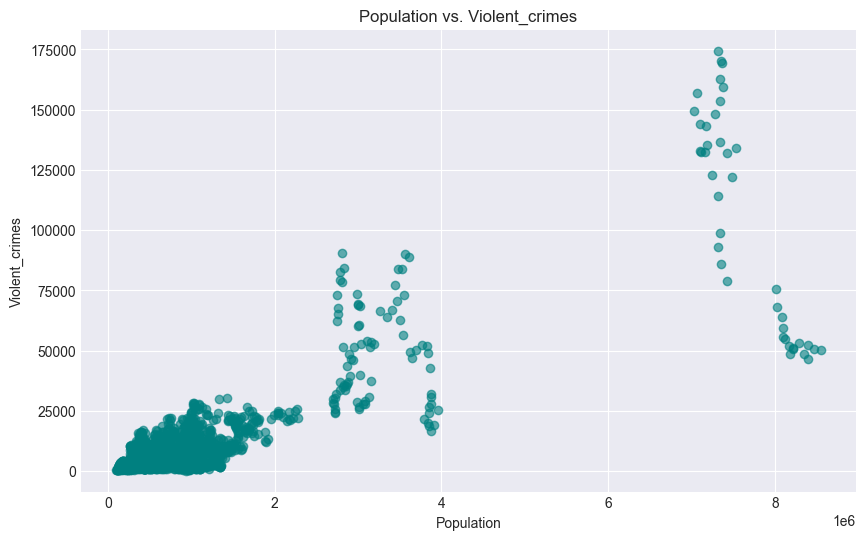

In [18]:
# Function to create scatter plot for population vs. violent crimes
def plot_scatter(x_column, y_column):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.6, color='teal')
    plt.title(f'{x_column.capitalize()} vs. {y_column.capitalize()}')
    plt.xlabel(x_column.capitalize())
    plt.ylabel(y_column.capitalize())
    plt.show()

# Calling the function for population vs. violent crimes scatter plot
plot_scatter('population', 'violent_crimes')

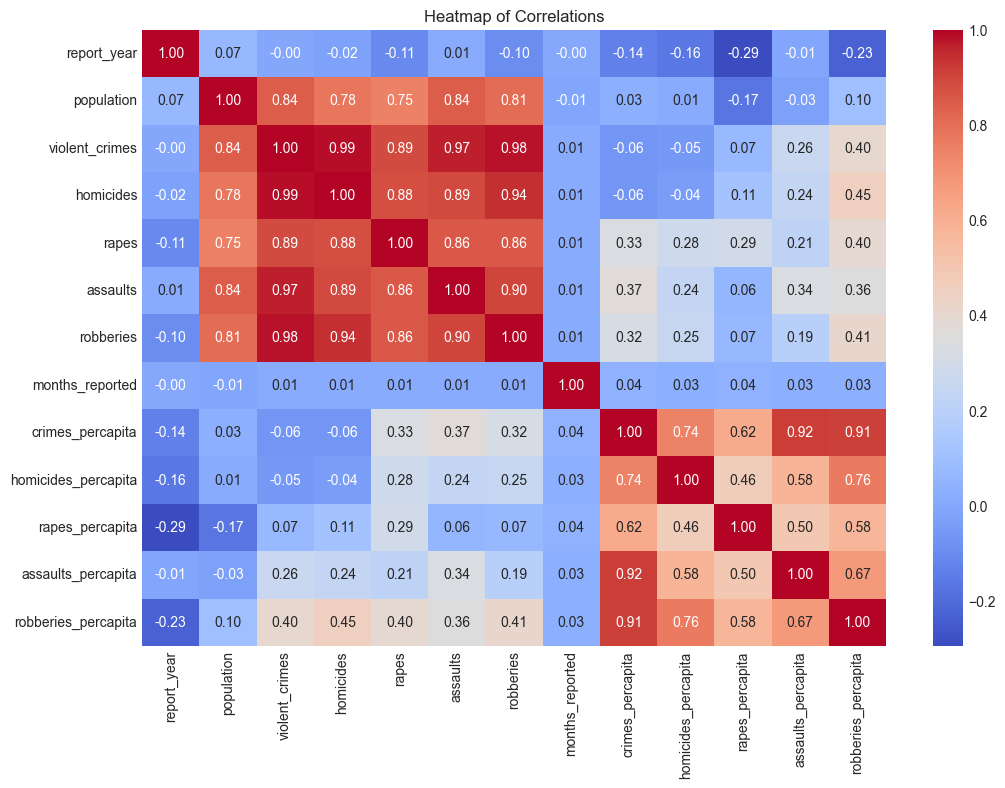

In [19]:
# Function to create heatmap for correlation matrix
def plot_heatmap(corr_data):
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap of Correlations')
    plt.show()

# Calling the function for heatmap
plot_heatmap(corr_matrix)

In [20]:
# Save the summary statistics and correlation to CSV files for report
df.describe().to_csv('summary_statistics.csv')
corr_matrix.to_csv('correlation_matrix.csv')